In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

In [2]:
!nvidia-smi

Fri May 12 16:33:31 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090         Off| 00000000:01:00.0  On |                  N/A |
| 85%   67C    P0              161W / 350W|    564MiB / 24576MiB |     12%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Load GoEmotions

In [3]:
train_text = pkl.load(open('./data/c4ai_clip/train_text.pkl', "rb"))[['text', 'grouped_label']]
test_text = pkl.load(open('./data/c4ai_clip/test_text.pkl', "rb"))[['text', 'grouped_label']]

In [4]:
go_emotions = pd.concat([train_text, test_text])

In [5]:
go_emotions.groupby("grouped_label").count()

,text
grouped_label,
anger,6039
disgust,664
fear,705
joy,19002
neutral,14429
sadness,2936
surprise,5062


In [6]:
disgust = go_emotions[go_emotions["grouped_label"] == "disgust"].sample(4000, replace=True, random_state=0)
fear = go_emotions[go_emotions["grouped_label"] == "fear"].sample(4000, replace=True, random_state=0)
joy = go_emotions[go_emotions["grouped_label"] == "joy"].sample(5000, replace=False, random_state=0)
neutral = go_emotions[go_emotions["grouped_label"] == "neutral"].sample(5000, replace=False, random_state=0)
sadness = go_emotions[go_emotions["grouped_label"] == "sadness"].sample(2000, replace=True, random_state=0)

In [7]:
go_emotions = go_emotions[go_emotions["grouped_label"] != "anger"]
go_emotions = go_emotions[go_emotions["grouped_label"] != "joy"]
go_emotions = go_emotions[go_emotions["grouped_label"] != "neutral"]
go_emotions = pd.concat([go_emotions, disgust, fear, joy, neutral, sadness])
go_emotions.groupby("grouped_label").count()

,text
grouped_label,
disgust,4664
fear,4705
joy,5000
neutral,5000
sadness,4936
surprise,5062


## Load Meld and IEMOCAP

In [8]:
train_df_erc = pd.read_csv("train_text_df.csv", index_col=0).rename(columns={"utterance":"text"})
train_df_erc["path"] = train_df_erc["path"].apply(lambda x: '/home/vmachado/Documents/' + x)
train_df_erc

,text,label,path
0,"OK, we got the cole slaw, we got the buns...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
1,"OK, we got the cole slaw, we got the buns... [...",disgust,/home/vmachado/Documents/multimodal-datasets/M...
2,"OK, we got the cole slaw, we got the buns... W...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
3,"Wait a minute, hold it. Johnson! Will you com...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
4,"Wait a minute, hold it. Johnson! Will you com...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
...,...,...,...
15862,"Right. Um, Thanks for asking, though. I mean, ...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15863,"God, that's like a whole problem with like-- B...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15864,"if you ever come out to Montgomery, I mean, yo...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15865,"call up the Sprint call center and, uh, you kn...",neutral,/home/vmachado/Documents/multimodal-datasets/I...


In [9]:
test_df_erc = pd.read_csv("test_text_df.csv", index_col=0).rename(columns={"utterance":"text"})
test_df_erc["path"] = test_df_erc["path"].apply(lambda x: '/home/vmachado/Documents/' + x)
test_df_erc

,text,label,path
0,"Brian, I need help.",sadness,/home/vmachado/Documents/multimodal-datasets/I...
1,"Brian, I need help. [CTX] Babe, I don't know w...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
2,"Babe, I don't know what to tell you. Don't gi...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
3,I don't--I'm just--I'm thinking maybe I should...,anger,/home/vmachado/Documents/multimodal-datasets/I...
4,"Well, of course not, but what are you going to...",anger,/home/vmachado/Documents/multimodal-datasets/I...
...,...,...,...
2753,Cantaloupe juice. Exactly. [CTX] You've tasted...,surprise,/home/vmachado/Documents/multimodal-datasets/M...
2754,Exactly. You've tasted it? You've tasted it. [...,neutral,/home/vmachado/Documents/multimodal-datasets/M...
2755,You've tasted it? You've tasted it. Uh huh. [C...,anger,/home/vmachado/Documents/multimodal-datasets/M...
2756,"Uh huh. Oh, you've tasted it. [CTX] You can ke...",neutral,/home/vmachado/Documents/multimodal-datasets/M...


In [10]:
test_df_erc["source"] = test_df_erc["path"].apply(lambda x: "meld" if "MELD" in x else "iemocap")
test_df_erc

,text,label,path,source
0,"Brian, I need help.",sadness,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
1,"Brian, I need help. [CTX] Babe, I don't know w...",neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
2,"Babe, I don't know what to tell you. Don't gi...",neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
3,I don't--I'm just--I'm thinking maybe I should...,anger,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
4,"Well, of course not, but what are you going to...",anger,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
...,...,...,...,...
2753,Cantaloupe juice. Exactly. [CTX] You've tasted...,surprise,/home/vmachado/Documents/multimodal-datasets/M...,meld
2754,Exactly. You've tasted it? You've tasted it. [...,neutral,/home/vmachado/Documents/multimodal-datasets/M...,meld
2755,You've tasted it? You've tasted it. Uh huh. [C...,anger,/home/vmachado/Documents/multimodal-datasets/M...,meld
2756,"Uh huh. Oh, you've tasted it. [CTX] You can ke...",neutral,/home/vmachado/Documents/multimodal-datasets/M...,meld


In [11]:
test_df_erc.groupby("source").count()

,text,label,path
source,,,
iemocap,1650,1650,1650
meld,1108,1108,1108


## Join datasets

In [12]:
train_df_erc

,text,label,path
0,"OK, we got the cole slaw, we got the buns...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
1,"OK, we got the cole slaw, we got the buns... [...",disgust,/home/vmachado/Documents/multimodal-datasets/M...
2,"OK, we got the cole slaw, we got the buns... W...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
3,"Wait a minute, hold it. Johnson! Will you com...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
4,"Wait a minute, hold it. Johnson! Will you com...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
...,...,...,...
15862,"Right. Um, Thanks for asking, though. I mean, ...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15863,"God, that's like a whole problem with like-- B...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15864,"if you ever come out to Montgomery, I mean, yo...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15865,"call up the Sprint call center and, uh, you kn...",neutral,/home/vmachado/Documents/multimodal-datasets/I...


In [13]:
train_df_erc.groupby("label").count()

,text,path
label,,
anger,3510,3510
disgust,273,273
fear,298,298
joy,2937,2937
neutral,6033,6033
sadness,1522,1522
surprise,1294,1294


In [14]:
disg = train_df_erc[train_df_erc["label"] == "disgust"].sample(2000, replace=True, random_state=0)
fear = train_df_erc[train_df_erc["label"] == "fear"].sample(2000, replace=True, random_state=0)
sadness = train_df_erc[train_df_erc["label"] == "sadness"].sample(1500, replace=True, random_state=0)
surprise = train_df_erc[train_df_erc["label"] == "surprise"].sample(1500, replace=True, random_state=0)

In [15]:
train_df_erc_resampled = pd.concat([train_df_erc, disg, fear, surprise, sadness]).reset_index(drop=True)

In [16]:
train_df_erc_resampled.groupby("label").count()

,text,path
label,,
anger,3510,3510
disgust,2273,2273
fear,2298,2298
joy,2937,2937
neutral,6033,6033
sadness,3022,3022
surprise,2794,2794


In [17]:
train_text

,text,grouped_label
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger
...,...,...
43405,Added you mate well I’ve just got the bow and ...,joy
43406,Always thought that was funny but is it a refe...,surprise
43407,What are you talking about? Anything bad that ...,anger
43408,"More like a baptism, with sexy results!",joy


In [18]:
train_text_final = pd.concat([go_emotions.rename(columns={"grouped_label":"label"}), train_df_erc_resampled, train_df_erc_resampled]).reset_index(drop=True).drop(columns="path")
#train_text_final = train_df_erc_resampled.assign(has_meld=train_df_erc_resampled["path"].apply(lambda x: True if "MELD" in x else False))

#train_text_final_meld = train_text_final[train_text_final["has_meld"] == True]

#train_text_final = pd.concat([train_text_final, train_text_final_meld]).reset_index(drop=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder()
lab_encoder.fit(train_text_final['label'].unique())

LabelEncoder()

## Modelling

In [20]:
import torch
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm

In [21]:
import torch
import torch.nn as nn

class SupConLoss(nn.Module):
    """Supervised Contrastive Learning: https://arxiv.org/pdf/2004.11362.pdf.
    It also supports the unsupervised contrastive loss in SimCLR"""
    def __init__(self, temperature=0.2, contrast_mode='all',
                 base_temperature=0.2):
        super(SupConLoss, self).__init__()
        self.temperature = temperature
        self.contrast_mode = contrast_mode
        self.base_temperature = base_temperature

    def forward(self, features, labels=None, mask=None, temperature=None, base_temperature=None):
        """Compute loss for model. If both `labels` and `mask` are None,
        it degenerates to SimCLR unsupervised loss:
        https://arxiv.org/pdf/2002.05709.pdf
        Args:
            features: hidden vector of shape [bsz, n_views, ...].
            labels: ground truth of shape [bsz].
            mask: contrastive mask of shape [bsz, bsz], mask_{i,j}=1 if sample j
                has the same class as sample i. Can be asymmetric.
        Returns:
            A loss scalar.
        """
        if temperature == None:
            temperature = self.temperature
        if base_temperature == None:
            base_temperature = self.base_temperature
        device = (torch.device('cuda')
                  if features.is_cuda
                  else torch.device('cpu'))

        if len(features.shape) < 3:
            raise ValueError('`features` needs to be [bsz, n_views, ...],'
                             'at least 3 dimensions are required')
        if len(features.shape) > 3:
            features = features.view(features.shape[0], features.shape[1], -1)

        batch_size = features.shape[0]
        if labels is not None and mask is not None:
            raise ValueError('Cannot define both `labels` and `mask`')
        elif labels is None and mask is None:
            mask = torch.eye(batch_size, dtype=torch.float32).to(device)
        elif labels is not None:
            labels = labels.contiguous().view(-1, 1)
            if labels.shape[0] != batch_size:
                raise ValueError('Num of labels does not match num of features')
            mask = torch.eq(labels, labels.T).float().to(device)
        else:
            mask = mask.float().to(device)

        contrast_count = features.shape[1]
        contrast_feature = torch.cat(torch.unbind(features, dim=1), dim=0)
        if self.contrast_mode == 'one':
            anchor_feature = features[:, 1]
            anchor_count = 1
        elif self.contrast_mode == 'all':
            anchor_feature = contrast_feature
            anchor_count = contrast_count
        else:
            raise ValueError('Unknown mode: {}'.format(self.contrast_mode))

        # compute logits
        anchor_dot_contrast = torch.div(
            torch.matmul(anchor_feature, contrast_feature.T),
            temperature)
        # for numerical stability
        logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
        logits = anchor_dot_contrast - logits_max.detach()

        # tile mask
        mask = mask.repeat(anchor_count, contrast_count)
        # mask-out self-contrast cases
        logits_mask = torch.scatter(
            torch.ones_like(mask),
            1,
            torch.arange(batch_size * anchor_count).view(-1, 1).to(device),
            0
        )
        mask = mask * logits_mask

        # compute log_prob
        exp_logits = torch.exp(logits) * logits_mask
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True))

        # compute mean of log-likelihood over positive
        mean_log_prob_pos = (mask * log_prob).sum(1) / mask.sum(1)

        # loss
        loss = - (temperature/base_temperature) * mean_log_prob_pos
        loss = loss.view(anchor_count, batch_size).mean()

        return loss

In [22]:
from transformers import AutoTokenizer, AutoModel

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


class TextEncoder(nn.Module):

    def __init__(self, model_name, max_len):
        super(TextEncoder, self).__init__()

        self.max_len = max_len
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        _ = self.tokenizer.add_tokens(['[NAME]', '[RELIGION]', '[LAUGHTER]', '[CTX]'], special_tokens=True)
        self.encoder = AutoModel.from_pretrained(model_name)
        self.encoder.resize_token_embeddings(len(self.tokenizer))
 
    def forward(self, sentences):
        
        tokenized = self.tokenizer(sentences, padding='max_length', truncation=True, return_tensors='pt', max_length=self.max_len)
        
        att_mask = tokenized["attention_mask"].to(0)
        tokenized = {
            "input_ids":tokenized["input_ids"].to(0),
            "attention_mask": att_mask
        }
        out = self.encoder(**tokenized)
        
        out = mean_pooling(out, att_mask)
        #out = out[:, 0, :]
        return out

In [23]:
import numpy as np
from tqdm import tqdm
import functools
import math

In [24]:
class TextCLIP(nn.Module):

    def __init__(self, 
                 text_encoder, 
                 in_features_text=384, 
                 wide_proj=1024, 
                 proj_size=128,
                 rate=0.2):
        super(TextCLIP, self).__init__()

        self.text_encoder = text_encoder
        self.wide_proj = nn.Sequential(self.text_encoder, nn.Linear(in_features_text, wide_proj))
        self.compressed_proj = nn.Linear(wide_proj, proj_size)
        self.rate = rate
        
    def forward(self, sentences):
        
        # View 1
        clf_emb = F.normalize(self.wide_proj(sentences), dim=-1)
        x1 = F.dropout(clf_emb, p=self.rate, training=self.training)
        x1 = F.normalize(self.compressed_proj(x1), dim=-1)
        
        return x1, clf_emb

In [25]:
train_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(train_text_final)))))
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=512, shuffle=True)

test_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(test_df_erc)))))
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=2048, shuffle=False)

In [26]:
import torchaudio
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
gc.enable()

In [27]:
import numpy as np
import faiss


class FaissKNeighbors:
    def __init__(self, k=5):
        self.index = None
        self.y = None
        self.k = k

    def fit(self, X, y):
        self.index = faiss.IndexFlatL2(X.shape[1])
        self.index.add(X.astype(np.float32))
        self.y = y

    def predict(self, X):
        distances, indices = self.index.search(X.astype(np.float32), k=self.k)
        votes = self.y[indices]
        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
        return predictions

In [28]:
#ss

100%|█████████████████████████████████████████████| 2/2 [00:03<00:00,  1.51s/it]


General - KNN F1: 0.5313005224115692 Acc: 0.5293691080493111
Iemocap - KNN F1: 0.578521351286709 Acc: 0.5921212121212122
Meld - KNN F1: 0.4456384972040546 Acc: 0.4359205776173285
Iemocap - KNN F1 (macro): 0.3887264136406888
Meld - KNN F1 (macro): 0.3718346471275276


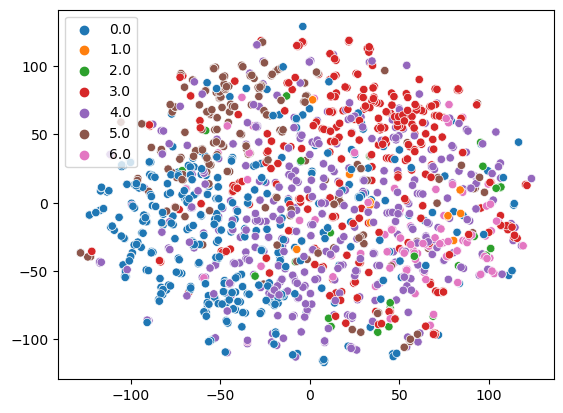

Epoch: 1 - Train Loss: 6.027261821591124


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


General - KNN F1: 0.5707673738239716 Acc: 0.574329224075417
Iemocap - KNN F1: 0.6272106998237751 Acc: 0.6418181818181818
Meld - KNN F1: 0.4790562292516216 Acc: 0.47382671480144406
Iemocap - KNN F1 (macro): 0.42864266228025916
Meld - KNN F1 (macro): 0.4047942097787748


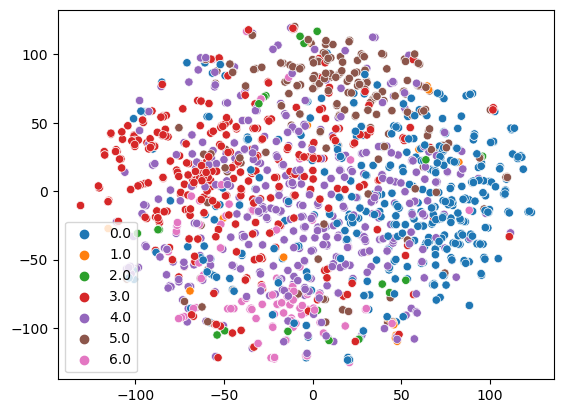

Epoch: 2 - Train Loss: 5.745449221864039


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.27s/it]


General - KNN F1: 0.5944084381217968 Acc: 0.5953589557650472
Iemocap - KNN F1: 0.6597925335514288 Acc: 0.666060606060606
Meld - KNN F1: 0.4906969988316537 Acc: 0.490072202166065
Iemocap - KNN F1 (macro): 0.44781554607305657
Meld - KNN F1 (macro): 0.4053416014090714


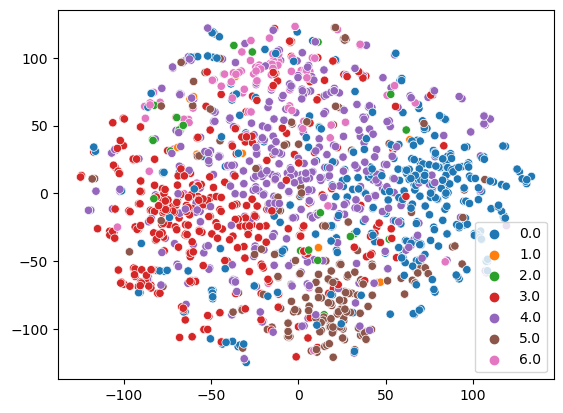

Epoch: 3 - Train Loss: 5.559683900301148


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.28s/it]


General - KNN F1: 0.5961278048553356 Acc: 0.5975344452501813
Iemocap - KNN F1: 0.6492989052393173 Acc: 0.656969696969697
Meld - KNN F1: 0.5114551466237367 Acc: 0.5090252707581228
Iemocap - KNN F1 (macro): 0.44369105617106436
Meld - KNN F1 (macro): 0.4263852119390263


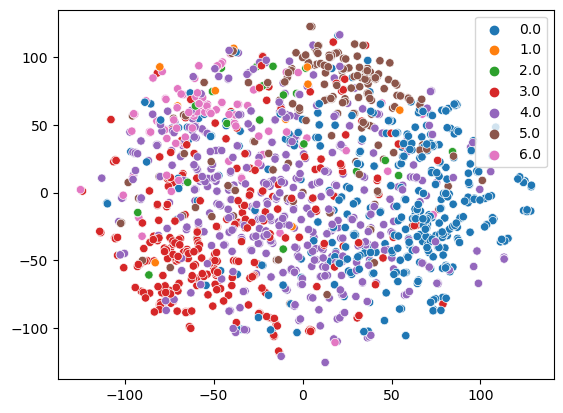

Epoch: 4 - Train Loss: 5.43593962987264


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


General - KNN F1: 0.6061252209899302 Acc: 0.6058738216098623
Iemocap - KNN F1: 0.6646740902912133 Acc: 0.666060606060606
Meld - KNN F1: 0.5159031087314354 Acc: 0.516245487364621
Iemocap - KNN F1 (macro): 0.5221865416926772
Meld - KNN F1 (macro): 0.4111320113415468


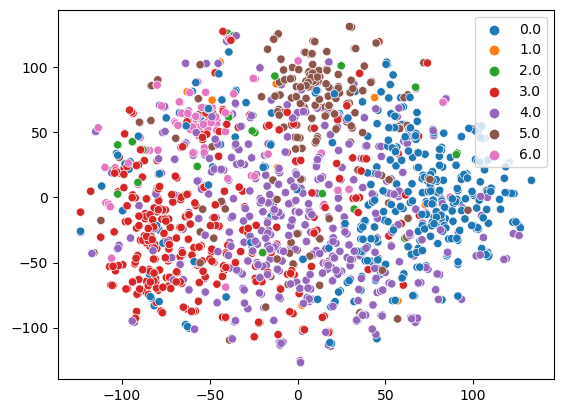

Epoch: 5 - Train Loss: 5.346668246651993


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.36s/it]


General - KNN F1: 0.6198033058905172 Acc: 0.621464829586657
Iemocap - KNN F1: 0.663583348348478 Acc: 0.6684848484848485
Meld - KNN F1: 0.5483968396049311 Acc: 0.5514440433212996
Iemocap - KNN F1 (macro): 0.5363058604362073
Meld - KNN F1 (macro): 0.4383229832945643


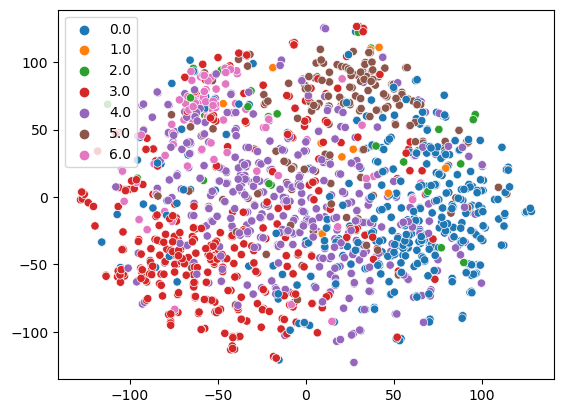

Epoch: 6 - Train Loss: 5.274505316805677


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.28s/it]


General - KNN F1: 0.6154627830555943 Acc: 0.6182015953589558
Iemocap - KNN F1: 0.6598399517574568 Acc: 0.6636363636363637
Meld - KNN F1: 0.5433188757697287 Acc: 0.5505415162454874
Iemocap - KNN F1 (macro): 0.5363433615725944
Meld - KNN F1 (macro): 0.4205812093233764


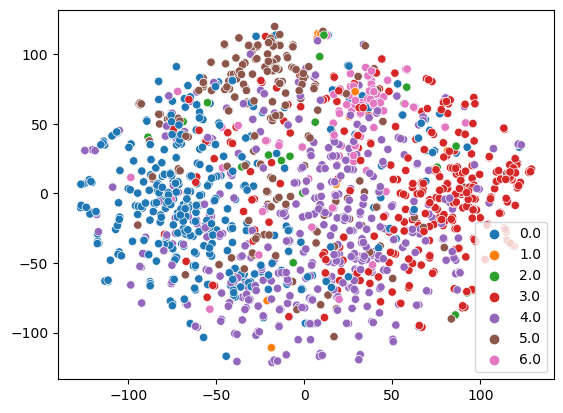

Epoch: 7 - Train Loss: 5.214996908797699


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.27s/it]


General - KNN F1: 0.6122891916906835 Acc: 0.6156635242929659
Iemocap - KNN F1: 0.6547950058657166 Acc: 0.6648484848484848
Meld - KNN F1: 0.5415435968562272 Acc: 0.5424187725631769
Iemocap - KNN F1 (macro): 0.5186768434381136
Meld - KNN F1 (macro): 0.4215744461208669


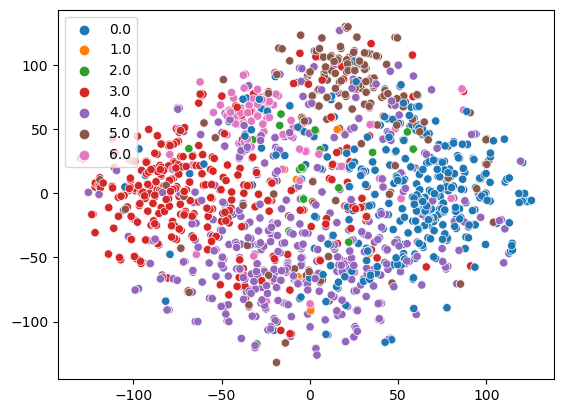

Epoch: 8 - Train Loss: 5.162402165990297


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


General - KNN F1: 0.621932308535797 Acc: 0.6221899927483684
Iemocap - KNN F1: 0.6774302973496346 Acc: 0.6775757575757576
Meld - KNN F1: 0.5351049476163141 Acc: 0.5397111913357401
Iemocap - KNN F1 (macro): 0.4610498753202149
Meld - KNN F1 (macro): 0.4183020660926266


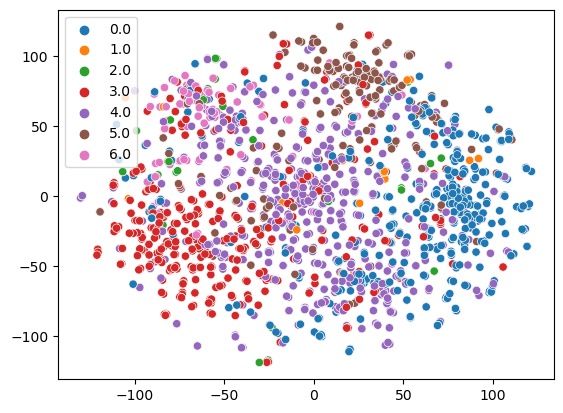

Epoch: 9 - Train Loss: 5.110450543513914


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


General - KNN F1: 0.6325542098344661 Acc: 0.6327048585931835
Iemocap - KNN F1: 0.6877752882186285 Acc: 0.6812121212121212
Meld - KNN F1: 0.5515420687645676 Acc: 0.5604693140794224
Iemocap - KNN F1 (macro): 0.4621642653483224
Meld - KNN F1 (macro): 0.4292074328809424


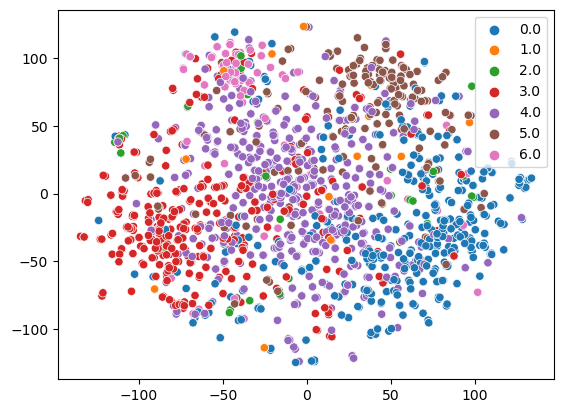

Epoch: 10 - Train Loss: 5.074436278570266


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


General - KNN F1: 0.6225913886987884 Acc: 0.6240029006526469
Iemocap - KNN F1: 0.6734629546727676 Acc: 0.6703030303030303
Meld - KNN F1: 0.5469330991654299 Acc: 0.5550541516245487
Iemocap - KNN F1 (macro): 0.46091730185590446
Meld - KNN F1 (macro): 0.39770215426928346


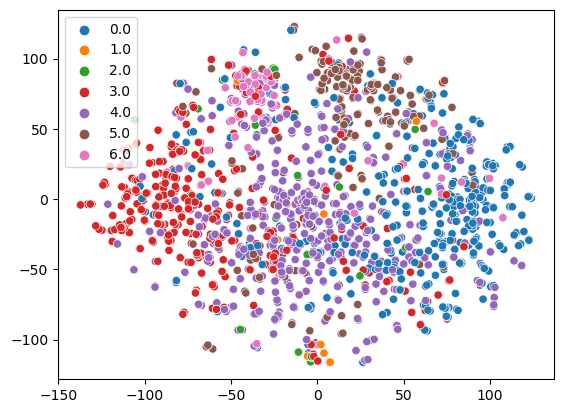

Epoch: 11 - Train Loss: 5.021159353710356


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.28s/it]


General - KNN F1: 0.6229224135373256 Acc: 0.6247280638143582
Iemocap - KNN F1: 0.6737371938747612 Acc: 0.6709090909090909
Meld - KNN F1: 0.5467895260403273 Acc: 0.555956678700361
Iemocap - KNN F1 (macro): 0.5277326793862335
Meld - KNN F1 (macro): 0.41007631799777233


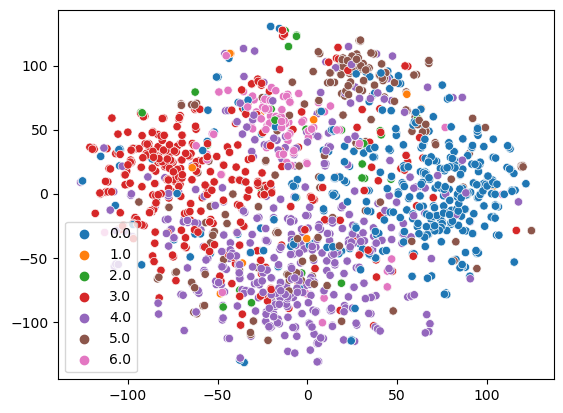

Epoch: 12 - Train Loss: 4.9832112708059295


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


General - KNN F1: 0.6178154815671141 Acc: 0.6182015953589558
Iemocap - KNN F1: 0.6624563100566473 Acc: 0.656969696969697
Meld - KNN F1: 0.5460925509155847 Acc: 0.5604693140794224
Iemocap - KNN F1 (macro): 0.45909590264811584
Meld - KNN F1 (macro): 0.42047963518947135


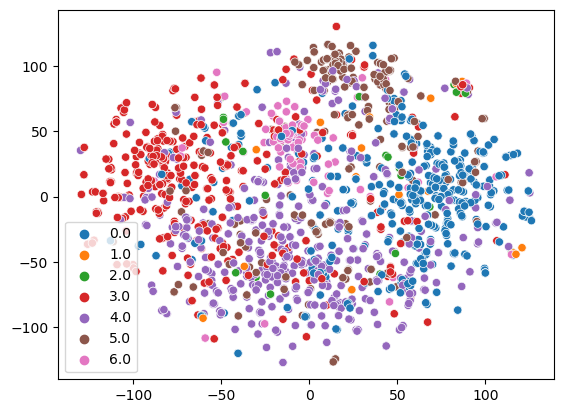

Epoch: 13 - Train Loss: 4.940818718501499


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


General - KNN F1: 0.6227192186291287 Acc: 0.6221899927483684
Iemocap - KNN F1: 0.6702972313181393 Acc: 0.6648484848484848
Meld - KNN F1: 0.5495786828521263 Acc: 0.5586642599277978
Iemocap - KNN F1 (macro): 0.5404274263500363
Meld - KNN F1 (macro): 0.4221167692521995


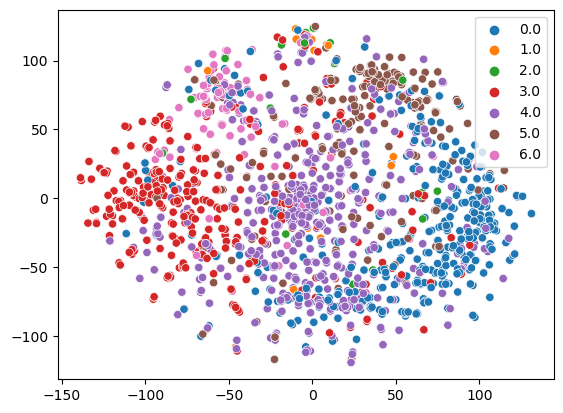

Epoch: 14 - Train Loss: 4.903511254965854


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.28s/it]


General - KNN F1: 0.6209340208336218 Acc: 0.6203770848440899
Iemocap - KNN F1: 0.6672267172201314 Acc: 0.6636363636363637
Meld - KNN F1: 0.5502657654967661 Acc: 0.555956678700361
Iemocap - KNN F1 (macro): 0.4507300767985424
Meld - KNN F1 (macro): 0.43282228216755947


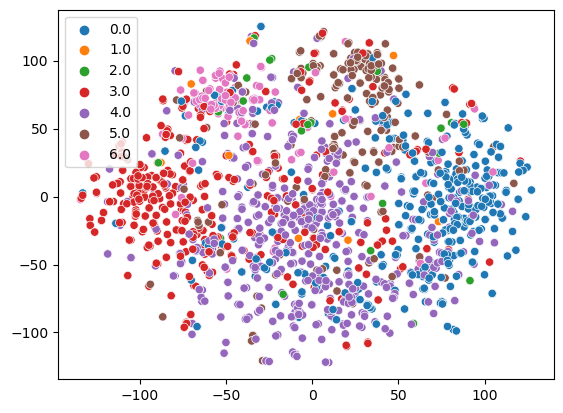

Epoch: 15 - Train Loss: 4.864124758713911


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.26s/it]


General - KNN F1: 0.6084671872647038 Acc: 0.6102248005801305
Iemocap - KNN F1: 0.6601906943904862 Acc: 0.6533333333333333
Meld - KNN F1: 0.5309169925217274 Acc: 0.546028880866426
Iemocap - KNN F1 (macro): 0.5269024466776403
Meld - KNN F1 (macro): 0.38905037160532785


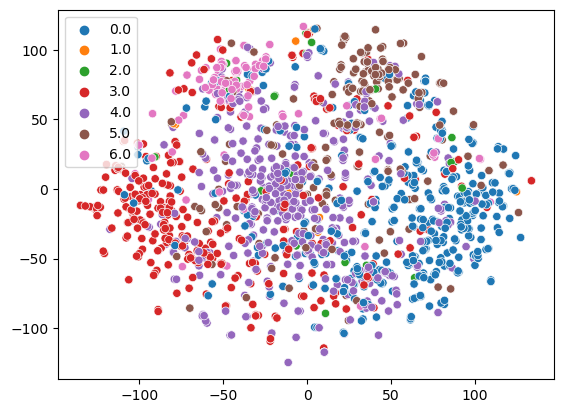

Epoch: 16 - Train Loss: 4.833754575171438


100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


General - KNN F1: 0.6173070339842286 Acc: 0.6200145032632343
Iemocap - KNN F1: 0.6669137378140222 Acc: 0.6606060606060606
Meld - KNN F1: 0.5465156614448649 Acc: 0.5595667870036101
Iemocap - KNN F1 (macro): 0.45753154320475786
Meld - KNN F1 (macro): 0.3971135345725509


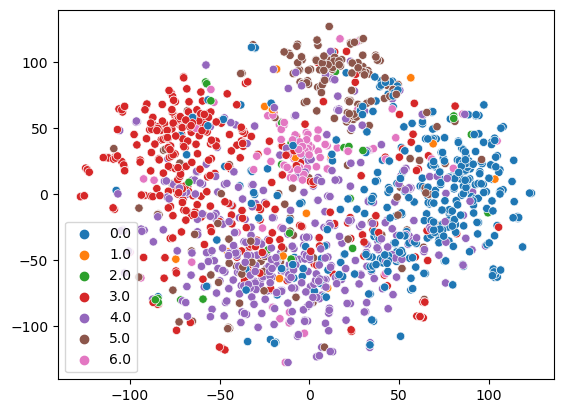

Epoch: 17 - Train Loss: 4.804905015595105


  4%|█▊                                         | 6/147 [00:05<02:13,  1.06it/s]


KeyboardInterrupt: 

In [29]:
MODEL_NAME = 'sentence-transformers/all-MiniLM-L12-v2'
PATH_TO_SAVE = 'text_encoder_ready_L2_test4'
!mkdir -p {PATH_TO_SAVE}

supcon_model = TextCLIP(
    TextEncoder(MODEL_NAME, max_len=128),
    in_features_text=384,
    wide_proj=2048,
    proj_size=128,
    rate=0.2,
)

supcon_loss = SupConLoss(temperature=0.1, contrast_mode='all', base_temperature=0.1)
supcon_model.to(0)

#supcon_model = torch.compile(supcon_model)
scaler = torch.cuda.amp.GradScaler()

e = 0
old_f1 = -float('inf')
old_f1_meld = -float('inf')
old_f1_iemocap = -float('inf')

param_optimizer = list(supcon_model.named_parameters())

no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{
    'params':
    [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
    'weight_decay_rate':
    0.1
}, {
    'params':
    [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
    'weight_decay_rate':
    0.0
}]

opt = torch.optim.AdamW(optimizer_grouped_parameters, lr=5e-5, betas=(0.9, 0.98), eps=1e-8)
scheduler = torch.optim.lr_scheduler.LinearLR(opt, start_factor=0.5, end_factor=0.9, total_iters=10)

epochs = 9999

while e < epochs:
    supcon_model.train()
    epoch_loss = 0.0
    proj_val = []
    targets_val = []

    proj_train = []
    targets_train = []

    preds = []

    for i, batch_indices in enumerate(tqdm(train_loader, total=len(train_loader))):
        if i == len(train_loader)-1:
            continue
        batch = train_text_final.iloc[batch_indices[0]]
        sentences = list(batch["text"])
        
        # Augment Context
        for k, s in enumerate(sentences):
            if '[CTX]' in s:

                if np.random.rand() < 0.5:
                    split = s.split('[CTX]')
                    if np.random.randint(0, 2) == 0:
                        sentences[k] = split[0]
                    else:
                        sentences[k] = split[1]
                    
        target = torch.Tensor(lab_encoder.transform(list(batch["label"])))

        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
            out, wide = supcon_model(sentences)
            out = out.unsqueeze(dim=1)
            loss = supcon_loss(out, labels=target)

        scaler.scale(loss).backward()
        scaler.unscale_(opt)
        torch.nn.utils.clip_grad_norm_(supcon_model.parameters(), 20.0)
        
        scaler.step(opt)
        scaler.update()
        
        opt.zero_grad(set_to_none=True)
        
        epoch_loss += loss.item()
        proj_train.append(np.array(wide.detach().cpu()))
        targets_train.append(np.array(target.cpu()))

        del out
        del wide
        gc.collect()
        torch.cuda.empty_cache()
        
    scheduler.step()
    proj_train = np.concatenate(proj_train, axis=0)
    targets_train = np.concatenate(targets_train, axis=0)
    
    clf = FaissKNeighbors(k=128)
    clf.fit(proj_train, np.array(targets_train, dtype=int))

    epoch_loss = epoch_loss/len(train_loader)
    supcon_model.eval()
    
    for i, batch_indices in enumerate(tqdm(test_loader, total=len(test_loader))):
        with torch.no_grad():
        
            batch = test_df_erc.iloc[batch_indices[0]]
            sentences = list(batch["text"])
            
            #for k, s in enumerate(sentences):
            #    if '[CTX]' not in s:
            #        sentences[k] = " [CTX] " + s
                
            target = torch.Tensor(lab_encoder.transform(list(batch["label"])))
            
            with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
                _, wide = supcon_model(sentences)
    
            wide = np.array(wide.cpu())
            pred = clf.predict(wide)

            preds.append(pred)
            proj_val.append(wide)
            targets_val.append(np.array(target.cpu()))

            del wide
            del target
            gc.collect()
            torch.cuda.empty_cache()

    proj_val = np.concatenate(proj_val, axis=0)
    targets_val = np.concatenate(targets_val, axis=0)
    preds = np.array(np.concatenate(preds, axis=0))

    general_f1 = f1_score(targets_val, preds, average='weighted')
    general_acc = accuracy_score(targets_val, preds)
    
    meld_idx = test_df_erc[test_df_erc["source"] == "meld"].index
    iemocap_idx = test_df_erc[test_df_erc["source"] != "meld"].index
    
    general_f1_iemocap = f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')
    general_acc_iemocap = accuracy_score(targets_val[iemocap_idx], preds[iemocap_idx])
    
    general_f1_meld = f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')
    general_acc_meld = accuracy_score(targets_val[meld_idx], preds[meld_idx])
    
    print(f'General - KNN F1: {general_f1} Acc: {general_acc}')
    print(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
    print(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')
    
    print(f"Iemocap - KNN F1 (macro): {f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='macro')}")
    print(f"Meld - KNN F1 (macro): {f1_score(targets_val[meld_idx], preds[meld_idx], average='macro')}")
    
    idx = np.random.randint(len(proj_val), size=2000)

    proj_val_samp = proj_val[idx, :]
    targets_val_samp = targets_val[idx]
    tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5).fit_transform(proj_val_samp)

    sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=targets_val_samp, palette='tab10')
    plt.show()

    print(f'Epoch: {e + 1} - Train Loss: {epoch_loss}')
    e += 1

    with open(f"{PATH_TO_SAVE}/metrics_epoch_{e}.txt", "w") as f:
        f.write(f'General - KNN F1 (weighted): {general_f1} Acc: {general_acc}')
        f.write(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
        f.write(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')
        
    if general_f1 > old_f1 or general_f1_iemocap > old_f1_iemocap or general_f1_meld > old_f1_meld:
        checkpoint = {"model": supcon_model.state_dict(),
                  "optimizer": opt.state_dict(),
                  "scaler": scaler.state_dict()}
        torch.save(checkpoint, f'{PATH_TO_SAVE}/pytorch_model_AudioTextCLIP_epoch_{e}.bin')

In [30]:
gc.collect()

839

In [ ]:
xx

In [31]:
supcon_model_best = TextCLIP(
    TextEncoder(MODEL_NAME, max_len=128),
    in_features_text=384,
    wide_proj=2048,
    proj_size=128,
    rate=0.2,
)

supcon_model_best.load_state_dict(torch.load(f'text_encoder_ready_L2_test2/pytorch_model_AudioTextCLIP_epoch_22.bin')['model'])

torch.save(supcon_model_best.text_encoder.state_dict(), f'text_encoder_ready_L2_test2/pytorch_model_AudioTextCLIP_epoch_22.bin')

In [32]:
supcon_model_best.to(0)

TextCLIP(
  (text_encoder): TextEncoder(
    (encoder): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30526, 384)
        (position_embeddings): Embedding(512, 384)
        (token_type_embeddings): Embedding(2, 384)
        (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=384, out_features=384, bias=True)
                (key): Linear(in_features=384, out_features=384, bias=True)
                (value): Linear(in_features=384, out_features=384, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=384, out_features=384, bias=True)
                (

100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.29s/it]


General - KNN F1: 0.6543500963407113 Acc: 0.6551849166062365
Iemocap - KNN F1: 0.702406282630383 Acc: 0.696969696969697
Meld - KNN F1: 0.5818509465673829 Acc: 0.5929602888086642


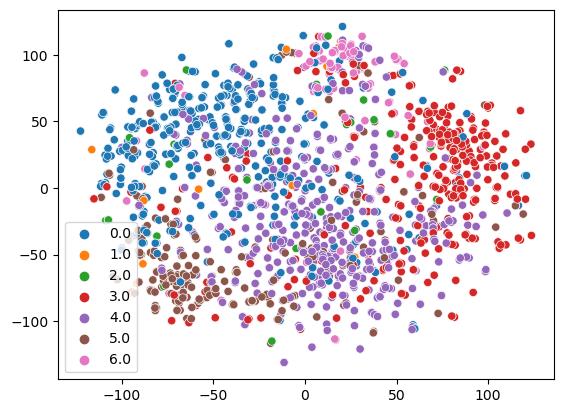

In [33]:
supcon_model_best.eval()
epoch_loss = 0.0
proj_val = []
targets_val = []

proj_train = []
targets_train = []

preds = []

for i, batch_indices in enumerate(tqdm(train_loader, total=len(train_loader))):
    with torch.no_grad():
        batch = train_text_final.iloc[batch_indices[0]]
        sentences = list(batch["text"])

        target = torch.Tensor(lab_encoder.transform(list(batch["label"])))

        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
            _, wide = supcon_model_best(sentences)

        proj_train.append(np.array(wide.detach().cpu()))
        targets_train.append(np.array(target.cpu()))

        del wide
        gc.collect()
        torch.cuda.empty_cache()

proj_train = np.concatenate(proj_train, axis=0)
targets_train = np.concatenate(targets_train, axis=0)

clf = FaissKNeighbors(k=128)
clf.fit(proj_train, np.array(targets_train, dtype=int))

epoch_loss = epoch_loss/len(train_loader)

for i, batch_indices in enumerate(tqdm(test_loader, total=len(test_loader))):
    with torch.no_grad():

        batch = test_df_erc.iloc[batch_indices[0]]
        sentences = list(batch["text"])
        target = torch.Tensor(lab_encoder.transform(list(batch["label"])))

        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
            _, wide = supcon_model_best(sentences)

        wide = np.array(wide.cpu())
        pred = clf.predict(wide)

        preds.append(pred)
        proj_val.append(wide)
        targets_val.append(np.array(target.cpu()))

        del wide
        del target
        gc.collect()
        torch.cuda.empty_cache()

proj_val = np.concatenate(proj_val, axis=0)
targets_val = np.concatenate(targets_val, axis=0)
preds = np.array(np.concatenate(preds, axis=0))

general_f1 = f1_score(targets_val, preds, average='weighted')
general_acc = accuracy_score(targets_val, preds)

meld_idx = test_df_erc[test_df_erc["source"] == "meld"].index
iemocap_idx = test_df_erc[test_df_erc["source"] != "meld"].index

general_f1_iemocap = f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')
general_acc_iemocap = accuracy_score(targets_val[iemocap_idx], preds[iemocap_idx])

general_f1_meld = f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')
general_acc_meld = accuracy_score(targets_val[meld_idx], preds[meld_idx])

print(f'General - KNN F1: {general_f1} Acc: {general_acc}')
print(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
print(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')

idx = np.random.randint(len(proj_val), size=2000)

proj_val_samp = proj_val[idx, :]
targets_val_samp = targets_val[idx]
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5).fit_transform(proj_val_samp)

sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=targets_val_samp, palette='tab10')
plt.show()

In [34]:
clf = FaissKNeighbors(k=128)
clf.fit(proj_train, np.array(targets_train, dtype=int))
preds = clf.predict(proj_val)

In [35]:
meld_idx = test_df_erc[test_df_erc["source"] == "meld"].index
iemocap_idx = test_df_erc[test_df_erc["source"] != "meld"].index

In [36]:
f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')

0.702406282630383

In [37]:
f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')

0.5818509465673829

In [38]:
from sklearn.metrics import classification_report

print(classification_report(targets_val[meld_idx], preds[meld_idx]))

              precision    recall  f1-score   support

         0.0       0.48      0.38      0.42       153
         1.0       0.29      0.27      0.28        22
         2.0       0.33      0.20      0.25        40
         3.0       0.49      0.55      0.52       163
         4.0       0.70      0.78      0.74       469
         5.0       0.52      0.35      0.42       111
         6.0       0.57      0.59      0.58       150

    accuracy                           0.59      1108
   macro avg       0.48      0.45      0.46      1108
weighted avg       0.58      0.59      0.58      1108



In [39]:
print(classification_report(targets_val[iemocap_idx], preds[iemocap_idx]))

              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79       551
         1.0       0.00      0.00      0.00         0
         2.0       0.20      0.20      0.20        10
         3.0       0.88      0.65      0.75       442
         4.0       0.53      0.61      0.57       384
         5.0       0.71      0.67      0.69       245
         6.0       0.31      0.67      0.42        18

    accuracy                           0.70      1650
   macro avg       0.48      0.52      0.49      1650
weighted avg       0.72      0.70      0.70      1650



/home/vmachado/anaconda3/envs/dl_ds_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vmachado/anaconda3/envs/dl_ds_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vmachado/anaconda3/envs/dl_ds_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
